# Извлечение навыков из вакансий на сайте hh.ru

Версия: 1.0 15.11.23  
Автор: [ArtyomR](https://github.com/ArtyomR)  
Источник: https://github.com/ArtyomR/hh_skills/  
Если Вы воспользовались этой тетрадкой и Вам пригодился рузльтат или просто понравилось, то отметьте её, пожалуйста, звездой.

## Задача и подход к решению 

**Задача:**  
Достаточно часто нужно понять какие требования к навыкам предъявляют работодатели к кандидатам на вакансии по определённым специальностям.  
**Подход к решению:**  
В этой тетрадке я использовал информацию, которую можно получить с сайта hh.ru. В вакансиях, публикуемых на hh.ru, информация о требованиях к навыкам кандидата расположена в 2х разделах
- Ключевые навыки
- Описание
<br>
<br>
Я извлеку данные из этих разделов и посмотрю, какие из них наиболее востребованы.

## Загружаем необходимые библиотеки

In [2]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Создаём функции для считывания вакансий, сохранения их в файл и чтения из файла

In [1]:
def fetch_vacancies_ids(query):
    raw_json = requests.get(
        'https://api.hh.ru/vacancies/',
        params={
            'text': query,
            'per_page': 100,
            'search_field': 'name',
        },
    ).json()
    return [v['id'] for v in raw_json['items']]

def fetch_vacancy_details(vacancy_id):
    return requests.get(
        f'https://api.hh.ru/vacancies/{vacancy_id}'
    ).json()

def dump_vacancies_to_json(vacancies, filepath):
    with open(filepath, 'w') as file_handler:
        json.dump(vacancies, file_handler)
        
def load_vacancies_from_file(filepath):
    with open(filepath, 'r') as file_handler:
        raw_vacancies = json.load(file_handler)
    return [v for v in raw_vacancies if 'id' in v]

## Считываем вакансии с hh.ru

In [3]:
vacancies_ids = fetch_vacancies_ids(query='аналитик данных')
vacancies = [fetch_vacancy_details(vacancy_id=i) for i in vacancies_ids]
vacancies[:1]

[{'id': '89425338',
  'premium': False,
  'billing_type': {'id': 'free', 'name': 'Бесплатная'},
  'relations': [],
  'name': 'Аналитик данных / Статистик',
  'insider_interview': None,
  'response_letter_required': False,
  'area': {'id': '1002',
   'name': 'Минск',
   'url': 'https://api.hh.ru/areas/1002'},
  'salary': {'from': 750, 'to': None, 'currency': 'BYR', 'gross': False},
  'type': {'id': 'open', 'name': 'Открытая'},
  'address': None,
  'allow_messages': True,
  'experience': {'id': 'noExperience', 'name': 'Нет опыта'},
  'schedule': {'id': 'fullDay', 'name': 'Полный день'},
  'employment': {'id': 'part', 'name': 'Частичная занятость'},
  'department': None,
  'contacts': None,
  'description': '<p>Open Business Analytics это современная и уникальная аналитическая платформа, специализирующаяся на исследовании розничного рынка продаж и покупательского поведения. Используя банковские транзакции, мы можем точно и ежедневно отслеживать динамику развития вплоть до отдельной точки 

In [4]:
print('Количество считанных вакансий: ',len(vacancies))

Количество считанных вакансий:  100


In [5]:
print('Список элементов содержащихся в вакансии.')
vacancies[:1][0].keys()

Список элементов содержащихся в вакансии.


dict_keys(['id', 'premium', 'billing_type', 'relations', 'name', 'insider_interview', 'response_letter_required', 'area', 'salary', 'type', 'address', 'allow_messages', 'experience', 'schedule', 'employment', 'department', 'contacts', 'description', 'branded_description', 'vacancy_constructor_template', 'key_skills', 'accept_handicapped', 'accept_kids', 'archived', 'response_url', 'specializations', 'professional_roles', 'code', 'hidden', 'quick_responses_allowed', 'driver_license_types', 'accept_incomplete_resumes', 'employer', 'published_at', 'created_at', 'initial_created_at', 'negotiations_url', 'suitable_resumes_url', 'apply_alternate_url', 'has_test', 'test', 'alternate_url', 'working_days', 'working_time_intervals', 'working_time_modes', 'accept_temporary', 'languages'])

## Сохраняем вакансии в файл и записываем в DataFrame

In [6]:
dump_vacancies_to_json(vacancies, filepath='da_vacancies.json')

In [7]:
vacancies_df=pd.DataFrame(vacancies)
vacancies_df.head()

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,...,suitable_resumes_url,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,languages
0,89425338,False,"{'id': 'free', 'name': 'Бесплатная'}",[],Аналитик данных / Статистик,None,False,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 750, 'to': None, 'currency': 'BYR', '...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/89425338,[],[],[],False,"[{'id': 'eng', 'name': 'Английский', 'level': ..."
1,89035627,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Младший аналитик данных,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/89035627,[],[],[],False,[]
2,89444180,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Аналитик данных мониторинга атмосферного воздуха,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 57000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/89444180,[],[],[],False,[]
3,89380163,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Аналитик данных (Data Science),None,True,"{'id': '2734', 'name': 'Иннополис', 'url': 'ht...","{'from': 50000, 'to': 100000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/89380163,[],[],[],True,[]
4,89396973,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Аналитик данных,None,False,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 110000, 'to': 150000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/89396973,[],[],[],False,[]


## Смотрим содержимое колонки key_skills

In [8]:
vacancies_df['key_skills'].head()

0    [{'name': 'Статистика, Python, SQL регрессионн...
1    [{'name': 'SQL'}, {'name': 'Разработка техниче...
2                                                   []
3    [{'name': 'Python'}, {'name': 'Математическая ...
4                                                   []
Name: key_skills, dtype: object

In [9]:
# считаем сколько вакансий имеют 'key_skills'
vacancies_df[vacancies_df['key_skills'].apply(len) != 0]['key_skills'].count()

67

## Смотрим содержимое колонки description

In [10]:
vacancies_df.loc[0,'description']

'<p>Open Business Analytics это современная и уникальная аналитическая платформа, специализирующаяся на исследовании розничного рынка продаж и покупательского поведения. Используя банковские транзакции, мы можем точно и ежедневно отслеживать динамику развития вплоть до отдельной точки продаж. Мы - стартап, основанный в 2020 году. Сейчас тестируем и развиваем продукт на белорусском рынке и готовимся к выходу в другие страны.</p> <p> </p> <p>Точность метрик, их близость к и высокая корреляция с фактическими данными является залогом доверия клиентов и ценности нашего продукта. Поэтому в нашу команду мы ищем специалиста, который будет заниматься одним важным компонентом продукта: моделированием и экстраполяцией метрик продаж. Вам предстоит извлечь максимальную пользу из уникального платежного поведения клиентов различных банков, а также решить задачу неравномерного географического распределения банковских клиентов.</p> <p> </p> <p><strong>Обязанности:</strong></p> <ul> <li> <p>⛏️ Сбор и си

Иформация о требуемых навыках находится в колонках 'key_skills' и 'description'

## Извлекаем навыки из колонки 'key_skills'

In [30]:
vacancies_df.loc[1,'key_skills']

[{'name': 'Power BI'},
 {'name': 'Аналитические исследования'},
 {'name': 'Работа с данными'},
 {'name': 'Базы данных'},
 {'name': 'MS Excel'},
 {'name': 'Аналитическое мышление'}]

Данные в 'key_skills' хранятся в словарях. Преобразуем их в списки.

### Преобразуем словари в списки

In [11]:
# Создаем функцию для извлечения значений 'name' из словарей
def extract_skill_names(skill_dict):
    return [skill['name'] for skill in skill_dict]

# Применяем эту функцию к столбцу 'key_skills'
vacancies_df['key_skills'] = vacancies_df['key_skills'].apply(extract_skill_names)

In [12]:
vacancies_df.loc[1,'key_skills']

['SQL',
 'Разработка технических заданий',
 'Математическая статистика',
 'Сбор и анализ информации',
 'Аналитическое мышление',
 'Анализ данных',
 'Работа с большим объемом информации',
 'Аналитические исследования',
 'Python']

### Посчитаем количество упоминаний навыков.

In [32]:
def skills_count_fn (skills_series):
    # Словарь для подсчета упоминаний каждого навыка
    skills_counts = {}

    # Перебераем все значения в Series
    for skills_list in skills_series:
        # Перебираем каждый навык в списке skills_list
        for skill in skills_list:
            # Если навык уже есть в словаре, увеличим его счетчик на 1
            if skill in skills_counts:
                skills_counts[skill] += 1
            # В противном случае добавим навык в словарь с начальным счетчиком 1
            else:
                skills_counts[skill] = 1

    return skills_counts

In [33]:
skills_count=skills_count_fn(vacancies_df['key_skills'])
skills_count

{'Статистика, Python, SQL регрессионные алгоритмы, ML, Excel': 1,
 'SQL': 42,
 'Разработка технических заданий': 1,
 'Математическая статистика': 4,
 'Сбор и анализ информации': 14,
 'Аналитическое мышление': 20,
 'Анализ данных': 33,
 'Работа с большим объемом информации': 20,
 'Аналитические исследования': 6,
 'Python': 24,
 'Pandas': 1,
 'Машинное обучение': 1,
 'Аналитика': 12,
 'Подготовка презентаций': 5,
 'Tableau': 5,
 'MS Excel': 22,
 'Power BI': 16,
 'Маркетинговый анализ': 1,
 'Анализ продаж': 1,
 'Анализ рынка': 2,
 'Базы данных': 8,
 'Работа с базами данных': 13,
 'Системный анализ': 3,
 'MS PowerPoint': 9,
 'adhoc запросы': 1,
 'Аналитические способности': 1,
 'MS SQL': 7,
 'Работа в команде': 3,
 'Внимательность': 1,
 'Усидчивость': 1,
 'MS Visio': 4,
 'CX – метрики': 3,
 'UML': 1,
 'СУБД': 2,
 'Коммуникативная стратегия': 1,
 'Big Data': 2,
 'Machine Learning': 1,
 'Яндекс.Метрика': 3,
 'Clickhouse': 1,
 'Google Analytics': 3,
 'Пользователь ПК': 1,
 'Грамотная речь': 2

### Построим график топ-20 навыков

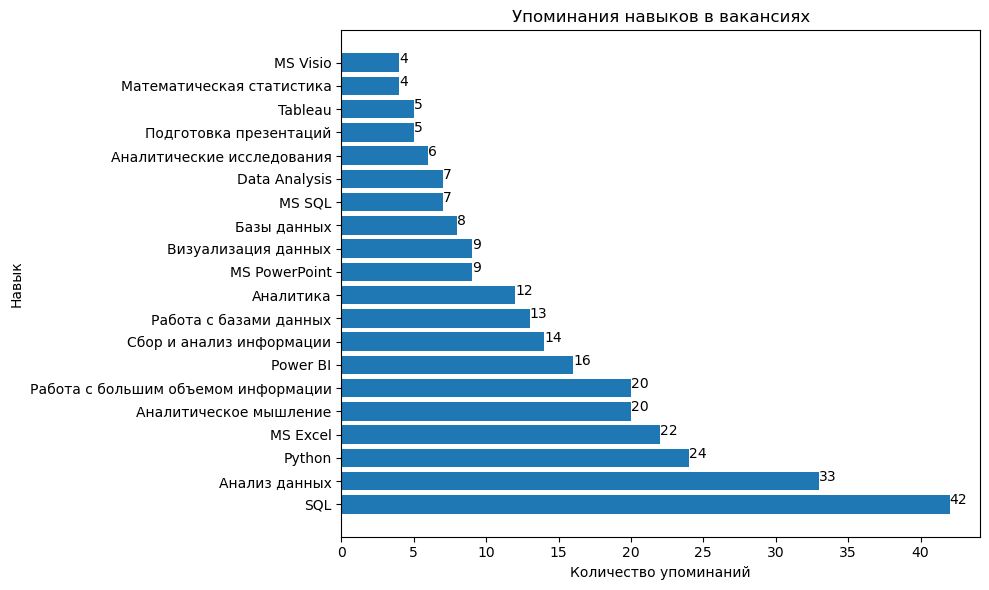

In [34]:
# Сортируем словарь по значениям (количество упоминаний) от большего к меньшему
# Навыков много, поэтому вывидем первые 20
sorted_skills_count = dict(sorted(skills_count.items(), key=lambda item: item[1], reverse=True)[:20])

# Разделим отсортированный словарь на ключи (навыки) и значения (количество упоминаний)
skills = list(sorted_skills_count.keys())
count = list(sorted_skills_count.values())

# Создаём горизонтальную столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.barh(skills, count)

# Настроим оси и подписи
plt.xlabel('Количество упоминаний')
plt.ylabel('Навык')
plt.title('Упоминания навыков в вакансиях')

# Добавим подписи значений к столбцам
for i, v in enumerate(count):
    plt.text(v, i, str(v))

# Отобразим график
plt.tight_layout()
plt.show()

## Извлекаем навыки из колонки 'description'

Посмортим ещё раз на то, как выглядит элемент 'description'

In [35]:
vacancies_df.loc[3, 'description']

'<p>Мы создали<strong> RANKS.pro</strong> — Систему оценки инвестиционной привлекательности акций. Мы анализируем более 50 000 компаний по всему миру с помощью Data Science.</p> <p>Проект динамично развивается командой профессионалов, для реализации нового проекта мы ищем Data аналитика, заинтересованного в быстром росте и долгосрочном сотрудничестве, который закроет ряд аналитических задач необходимых для успешной работы.</p> <p><strong>Обязанности:</strong></p> <ul> <li>Свод и анализ разнообразных наборов рыночных и финансовых данных.</li> <li>Поиск и проверка гипотез по улучшению качества ML-моделей</li> <li>Общение с аналитиками и совместный поиск перспективных направлений работы</li> <li>Работа, направленная на улучшение работы ML-моделей и обогащение данных для нее</li> </ul> <p>Требования:</p> <ul> <li>Знание математической статистики</li> <li>Хорошее знание Python и опыт работы с библиотеками для работы с данными и их визуализации (numpy, pandas, SciPy matplotlib, seaborn)</li>

### Создаём функции для извлечения навыков из описания вакансий

In [36]:
def extract_title_from(raw_block, max_title_len=40):
    '''
    Функция извлекает заголовок блока. Заголовком считаем текст выделенный тегом <strong>.
    Пример <p><strong>Позиция: </strong>Аналитик данных</p>
    '''
    soup = BeautifulSoup(raw_block.strip(), "html.parser")
    title = soup.find('strong')
    if not title:
        return None
    title = title.text.replace(':','')
    return title if len(title) <= max_title_len else None

In [37]:
def calculate_block_type(block_title):
    '''
    Функция определяет тип блока. Определяется один из типов 'secondary_skills' (дополнительные навыки) и 
    'primary_skills' (основные навыки).
    Пример <p><strong>Позиция: </strong>Аналитик данных</p>
    '''
    optional_triggers = {
        'будет преимуществом',
        'дополнительные требования',
        'а ещ',
        'будет плюсом',
        'будет большим плюсом',
        'желательно',
    }
    required_triggers = {
        'требования',
        'от вас нужно',
        'нужно знать',
        'наши ожидания',
        'мы ожидаем',
        'ожидания от квалификации',
        'обязанности',
        'мы ждем от вас',
        'требования к кандидатам',
    }
    for trigger in optional_triggers:
        if trigger in block_title.lower():
            return 'secondary_skills'
    for trigger in required_triggers:
        if trigger in block_title.lower():
            return 'primary_skills'

In [38]:
def extract_technologies_from(raw_block):
    '''
    Функция находит навыки ('technologies') в заданном списка и возвращает их.
    '''
    all_technologies = [
        'django', 
        'visio',
        'flask',
        'aiohttp',
        'sqlalchemy',
        'docker',
        'fastapi',
        'selenium',
        'drf',
        'postgresql', 'oracle pl', 'clickhouse',
        'redis',
        'rabbit mq',
        'kubernetes',
        'elastic',
        'kafka',
        'pandas',
        'git',
        'power bi', 'datalens', 'pentaho', 'powerbi',
        'tableau', 
        'qlik', 
        'python', 
        ' r ',
        'sql',
        'excel' 
        'power pivot',
        'numpy', 
        'scipy', 
        'seaborn',
        'plotly',
        'битрикс24', '1с',
        'airflow',
        'etl',
        'ml'
    ]
    return [t for t in all_technologies if t in raw_block.lower()]

In [39]:
def skills_from_description (raw_vacancy):

    '''
    Функция находит блоки типов 'secondary_skills' (дополнительные навыки) и 
    'primary_skills' (основные навыки). И в них находит навыки из заданного списка.
    '''

    # Словари с триггерами и переменными для текстов
    optional_triggers = {
    'будет преимуществом',
    'дополнительные требования',
    'а ещ',
    'будет плюсом',
    'будет большим плюсом',
    'желательно',
    }
    required_triggers = {
    'требования',
    'от вас нужно',
    'нужно знать',
    'наши ожидания',
    'мы ожидаем',
    'ожидания от квалификации',
    'обязанности',
    'мы ждем от вас',
    'требования к кандидатам',
    'мы ждём',
    'что мы ждем от тебя'
    }

    # Создаем объект BeautifulSoup
    soup = BeautifulSoup(raw_vacancy, 'html.parser')

    # Список заголовков блоков
    block_titles = soup.find_all('strong')

    required_technologies = ''
    optional_technologies = ''

    # Проходим по заголовкам и соответствующим текстам
    for block_title in block_titles:
        block = block_title.find_next('ul')
        #block = block_title.find_next_sibling()
        if block:
            block_title_text = block_title.get_text().strip().lower()
            #print(block_title_text)
            for trigger in optional_triggers:
                if trigger in block_title_text:
                    optional_technologies = extract_technologies_from(' '.join([p.get_text().strip() for p in block.find_all('li')]))
            for trigger in required_triggers:
                if trigger in block_title_text:
                    required_technologies = extract_technologies_from(' '.join([p.get_text().strip() for p in block.find_all('li')]))
    return required_technologies, optional_technologies

### Добавим в DataFrame колонки с извлеченными навыками 'required_skills' и 'optional_skills'

In [40]:
vacancies_df[['required_skills', 'optional_skills']]=vacancies_df['description'].apply(lambda x: pd.Series(skills_from_description(x)))

In [41]:
vacancies_df[['required_skills', 'optional_skills']]

,required_skills,optional_skills
0,"[python, sql, ml]",
1,,
2,[],
3,[ml],
4,,
...,...,...
95,"[pandas, git, python, sql, numpy]",
96,"[sqlalchemy, postgresql, pandas, python, sql]",
97,[],
98,[],


In [42]:
# считаем сколько вакансий имеют 'required_skills'
vacancies_df[vacancies_df['required_skills'].apply(len) != 0]['key_skills'].count()

54

In [43]:
# считаем сколько вакансий имеют 'optional_skills'
vacancies_df[vacancies_df['optional_skills'].apply(len) != 0]['key_skills'].count()

4

In [44]:
vacancies_df.loc[0,'required_skills']

['python', 'sql', 'ml']

### Посчитаем количество упоминаний навыков в колнке 'required_skills'

In [45]:
desc_skills_count=skills_count_fn(vacancies_df['required_skills'])
desc_skills_count

{'python': 23,
 'sql': 49,
 'ml': 4,
 'power bi': 14,
 'postgresql': 4,
 'oracle pl': 1,
 'etl': 7,
 'pandas': 5,
 'git': 3,
 'numpy': 4,
 'scipy': 1,
 'seaborn': 1,
 'visio': 3,
 'clickhouse': 4,
 'tableau': 7,
 'docker': 1,
 'datalens': 2,
 'airflow': 2,
 'powerbi': 2,
 'qlik': 2,
 ' r ': 1,
 '1с': 3,
 'битрикс24': 1,
 'sqlalchemy': 1}

### Построим график навыков, извлеченных из описания

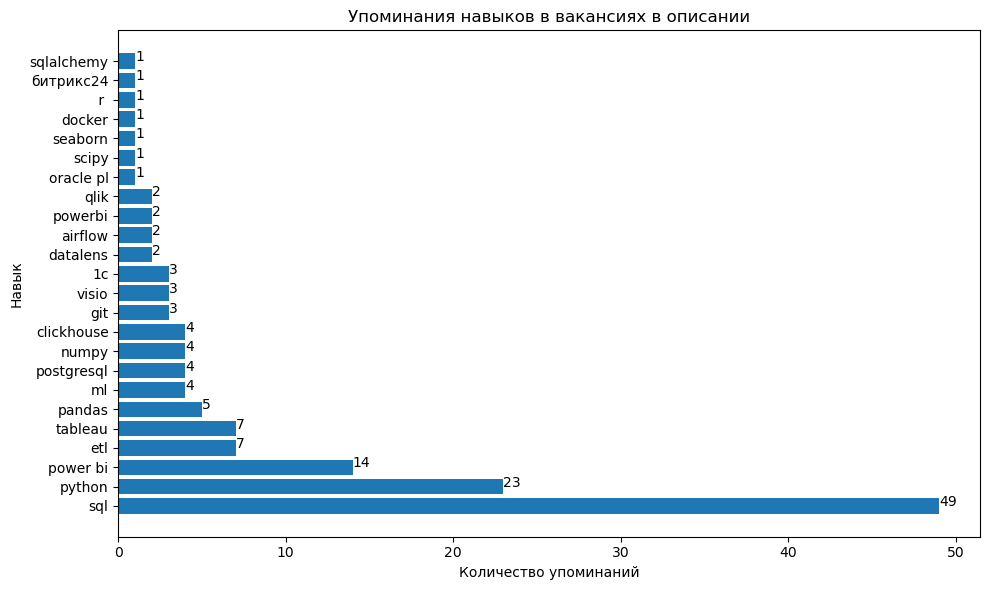

In [47]:
# Сортируем словарь по значениям (количество упоминаний) от большего к меньшему
sorted_skills_count = dict(sorted(desc_skills_count.items(), key=lambda item: item[1], reverse=True))

# Разделим отсортированный словарь на ключи (навыки) и значения (количество упоминаний)
skills = list(sorted_skills_count.keys())
count = list(sorted_skills_count.values())

# Создаём горизонтальную столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.barh(skills, count)

# Настроим оси и подписи
plt.xlabel('Количество упоминаний')
plt.ylabel('Навык')
plt.title('Упоминания навыков в вакансиях в описании')

# Добавим подписи значений к столбцам
for i, v in enumerate(count):
    plt.text(v, i, str(v))

# Отобразим график
plt.tight_layout()
plt.show()

## Источники  информации

- [Код](https://gist.github.com/Melevir/584067acc05d6b82bd2ae76af346abf1) от Ильи Лебедева (Melevir) частично использован в этой тетрадке. 
- Также можно посмотреть примеры исследования вакансий [здесь](https://github.com/hukenovs/hh_research/).
- [Документация API HeadHunter hh.ru](https://github.com/hhru/api)  
<br>
<br>
Если Вы воспользовались этой тетрадкой и Вам пригодился рузльтат или просто понравилось, то отметьте её, пожалуйста, звездой.